### Q3 - Correlogram

In [77]:
import os
import numpy as np
from poisson import coefficient_of_variation
from load import load_data, generate_spiking_times
import matplotlib.pyplot as plt

In [120]:
file_path = os.getenv('ABS_PATH') + "/rho.dat"
spikes = load_data(file_path, int)

print("Lenght of data:",len(spikes))
print("Firing Events:", np.sum(spikes))
print(spikes[0:18])

Lenght of data: 600000
Firing Events: 53601
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [121]:
spike_train = generate_spiking_times(spikes)
spike_train[0:5]

[0.034000000000000016,
 0.044000000000000025,
 0.05000000000000003,
 0.06200000000000004,
 0.06800000000000005]

In [125]:
raw_correlations = np.zeros(50)
train_length = len(spike_train)

for i, spike_time in enumerate(spike_train[:100]):
#     print("Spike", i, spike_time)
    j = i + 1

    while j < train_length:
        next_spike = spike_train[j]
        time_diff_ms = next_spike - spike_time
        
        if time_diff_ms <= 0.100:
            adj_bin = int(time_diff_ms * 1000)
            adj_bin = int(adj_bin/2)
            raw_correlations[adj_bin] += 1
#             print(j, time_diff_ms, adj_bin)
        else:
            break
            
        j += 1

positive_correlations = np.array(raw_correlations)
print(len(positive_correlations))
positive_correlations

50


array([ 0.,  3., 27., 27., 28., 21., 33., 19., 31., 17., 23., 22., 16.,
       22., 17., 21., 14., 19., 18., 15., 16., 14., 17., 14., 16., 12.,
       16.,  9., 19.,  8., 11., 13., 14., 10., 12., 12., 15., 10., 11.,
       16.,  7., 18., 10., 13.,  9., 13.,  9., 13.,  9., 11.])

In [126]:
negative_correlations = np.flip(positive_correlations)[:-1]
# print(len(negative_correlations))
# negative_correlations
correlations = np.append(negative_correlations, positive_correlations)
print(len(correlations))
correlations

99


array([11.,  9., 13.,  9., 13.,  9., 13., 10., 18.,  7., 16., 11., 10.,
       15., 12., 12., 10., 14., 13., 11.,  8., 19.,  9., 16., 12., 16.,
       14., 17., 14., 16., 15., 18., 19., 14., 21., 17., 22., 16., 22.,
       23., 17., 31., 19., 33., 21., 28., 27., 27.,  3.,  0.,  3., 27.,
       27., 28., 21., 33., 19., 31., 17., 23., 22., 16., 22., 17., 21.,
       14., 19., 18., 15., 16., 14., 17., 14., 16., 12., 16.,  9., 19.,
        8., 11., 13., 14., 10., 12., 12., 15., 10., 11., 16.,  7., 18.,
       10., 13.,  9., 13.,  9., 13.,  9., 11.])

In [127]:
x = np.arange(-99,99,2)
print(x.shape)
x

(99,)


array([-99, -97, -95, -93, -91, -89, -87, -85, -83, -81, -79, -77, -75,
       -73, -71, -69, -67, -65, -63, -61, -59, -57, -55, -53, -51, -49,
       -47, -45, -43, -41, -39, -37, -35, -33, -31, -29, -27, -25, -23,
       -21, -19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,
         5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,  27,  29,
        31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,
        57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,
        83,  85,  87,  89,  91,  93,  95,  97])

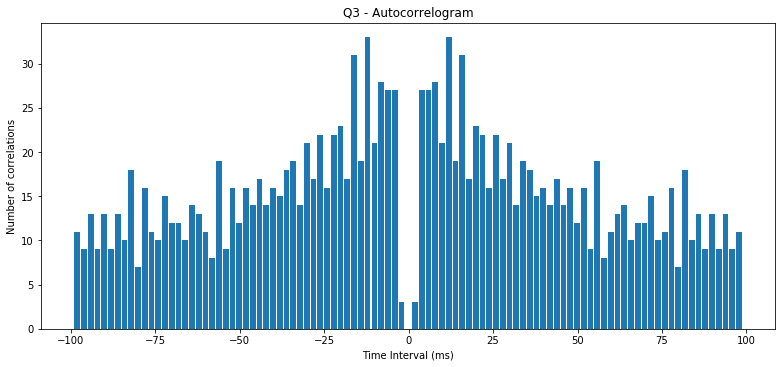

In [162]:

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0.1,0.1,0.85,0.85])

ax.bar(x, correlations, align='edge', width=1.7)
plt.ylabel("Number of correlations")
plt.xlabel("Time Interval (ms)")
plt.title("Q3 - Autocorrelogram")
plt.show()
fig.savefig('autocorrelations.png', dpi=fig.dpi)